# Task 4: Optimize Portfolio Based on Forecast

#### Import Libraries and paths

In [1]:
# --- Imports & Paths ---
import os
import pandas as pd
import numpy as np

# Local modules
import sys
sys.path.append("../src")

from portfolio_opt import (
    compute_daily_returns,
    expected_return_from_tsla_forecast,
    optimize_portfolio,
    plot_efficient_frontier,
    format_weights
)


#### Load historical prices & TSLA forecast

In [2]:

tsla_prices = pd.read_csv("../data/TSLA.csv", parse_dates=["Date"]).set_index("Date")["Close"]
bnd_prices  = pd.read_csv("../data/BND.csv",  parse_dates=["Date"]).set_index("Date")["Close"]
spy_prices  = pd.read_csv("../data/SPY.csv",  parse_dates=["Date"]).set_index("Date")["Close"]

prices = pd.concat([tsla_prices.rename("TSLA"),
                    bnd_prices.rename("BND"),
                    spy_prices.rename("SPY")], axis=1).dropna()

# Daily returns (historical) for covariance & BND/SPY expected returns
daily_returns = prices.pct_change().dropna()

# Loading TSLA forecast from Task 3
tsla_fc = pd.read_csv("../model/tsla_future_forecast.csv", parse_dates=["Date"]).set_index("Date")

tsla_exp_ann = expected_return_from_tsla_forecast(tsla_fc)
tsla_exp_ann


np.float64(-3.441362750737213)

#### Plot Frontier

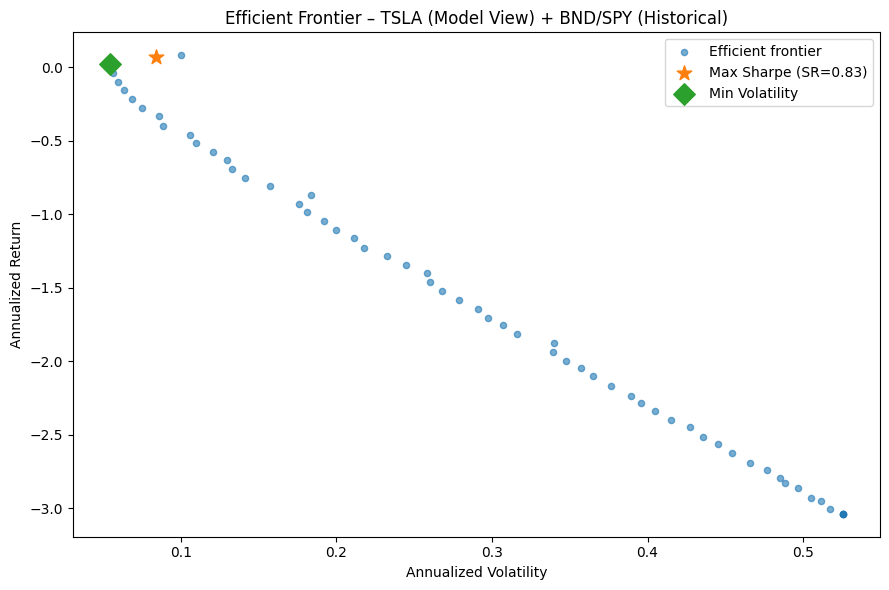

In [3]:
# --- Run optimization (Efficient Frontier, Max Sharpe, Min Vol) ---
# risk-free rate (set to 0 or your local benchmark; e.g., 0.02 for 2%)
RF = 0.0

frontier = optimize_portfolio(
    daily_returns=daily_returns[["TSLA","BND","SPY"]],
    tsla_expected_return_annual=tsla_exp_ann,
    rf=RF,
    use_pypfopt=True   # if pypfopt is installed; fallback exists otherwise
)

# Plot the frontier
plot_efficient_frontier(frontier, title="Efficient Frontier – TSLA (Model View) + BND/SPY (Historical)")
